In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
Root = "/content/drive/MyDrive/Colab_Notebooks/RAVDESS_Emotional_speech_audio"
os.chdir(Root)

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/Colab_Notebooks/RAVDESS_Emotional_speech_audio/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

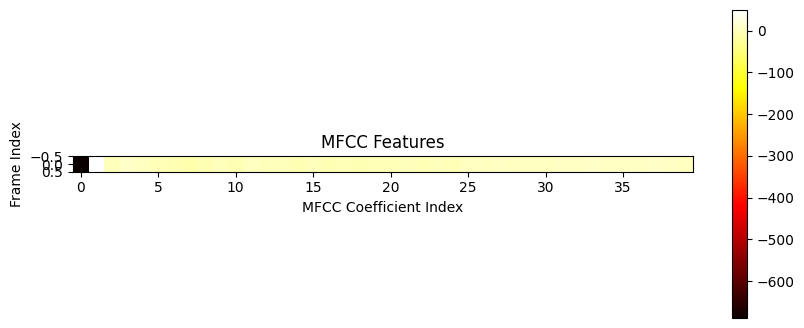

In [ ]:
#feature extraction of single audio file

import matplotlib.pyplot as plt

# Assuming `features` contains the extracted MFCC features for a single audio file
# Replace this with your actual extracted features
features = extract_feature("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_22/03-01-01-01-01-01-22.wav", mfcc=True, chroma=False, mel=False)

# Reshape the features array to a two-dimensional array
features = np.expand_dims(features, axis=0)

# Plot the MFCC features
plt.figure(figsize=(10, 4))
plt.imshow(features, cmap='hot', interpolation='nearest')
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('Frame Index')
plt.title('MFCC Features')
plt.colorbar()
plt.show()

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-3.68174896e+02,  1.21515379e+01, -4.14459991e+01, ...,
         5.45278145e-03,  3.56062222e-03,  2.32826290e-03],
       [-5.14403931e+02,  4.80448494e+01, -5.70844221e+00, ...,
         6.36323472e-04,  3.50693212e-04,  2.58891261e-04],
       [-6.44561218e+02,  5.93864594e+01, -2.59522462e+00, ...,
         3.52405150e-05,  2.10023773e-05,  6.03958415e-06],
       ...,
       [-5.83057373e+02,  5.65378685e+01,  1.27148829e+01, ...,
         3.85837280e-04,  1.41704673e-04,  5.53765858e-05],
       [-5.88361938e+02,  5.49091339e+01,  5.89508104e+00, ...,
         8.18600645e-04,  4.50074294e-04,  1.45487575e-04],
       [-5.38950684e+02,  5.45297089e+01, -7.08946514e+00, ...,
         3.92891583e-04,  3.21652478e-04,  2.15702996e-04]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['calm', 'calm', 'happy', 'happy', 'disgust', 'disgust', 'happy',
       'happy', 'disgust', 'happy', 'happy', 'happy', 'happy', 'fearful',
       'fearful', 'disgust', 'happy', 'calm', 'disgust', 'fearful',
       'calm', 'disgust', 'fearful', 'disgust', 'fearful', 'happy',
       'disgust', 'calm', 'happy', 'calm', 'disgust', 'disgust', 'happy',
       'fearful', 'fearful', 'calm', 'fearful', 'disgust', 'calm', 'calm',
       'fearful', 'disgust', 'happy', 'happy', 'disgust', 'happy',
       'disgust', 'calm', 'fearful', 'fearful', 'fearful', 'disgust',
       'disgust', 'fearful', 'calm', 'disgust', 'happy', 'fearful',
       'calm', 'happy', 'disgust', 'calm', 'disgust', 'happy', 'fearful',
       'calm', 'disgust', 'disgust', 'fearful', 'disgust', 'fearful',
       'disgust', 'disgust', 'fearful', 'disgust', 'disgust', 'fearful',
       'calm', 'calm', 'disgust', 'fearful', 'calm', 'happy', 'calm',
       'fearful', 'fearful', 'calm', 'happy', 'fearful', 'fearful',
       'f

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 76.56%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.88073394, 0.79120879, 0.69306931, 0.6746988 ])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,calm,calm
1,happy,calm
2,happy,happy
3,happy,happy
4,disgust,disgust
5,happy,disgust
6,happy,happy
7,happy,happy
8,disgust,disgust
9,calm,happy


<Axes: xlabel='Predicted'>

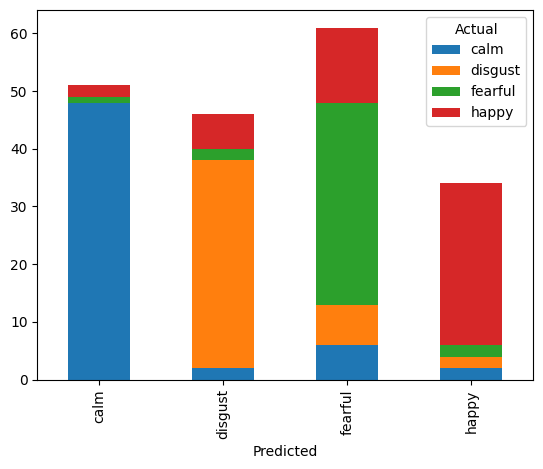

In [ ]:
# @title Predicted vs. actual emotion

df.groupby(['Predicted', 'Actual']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Actual'>

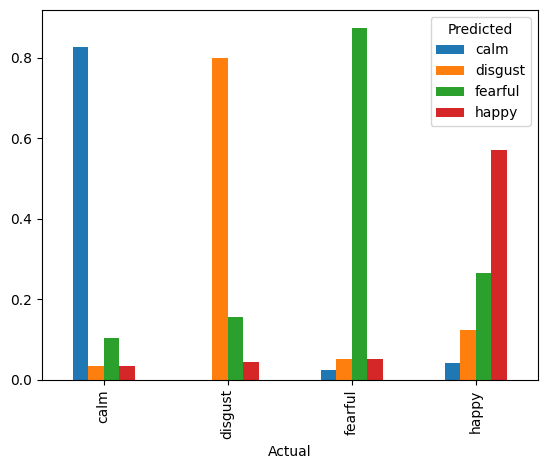

In [ ]:
# @title Accuracy by emotion

df.groupby('Actual')['Predicted'].value_counts(normalize=True).unstack().plot(kind='bar')

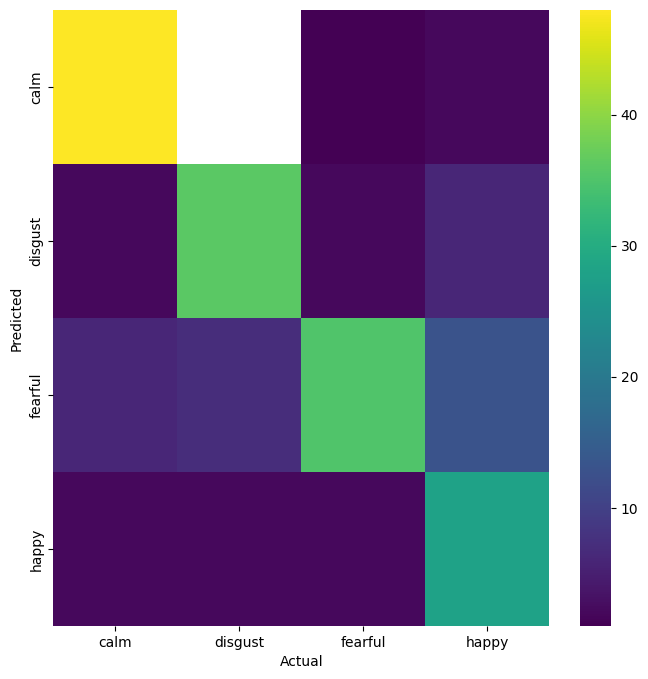

In [ ]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Predicted'].value_counts()
    for x_label, grp in df.groupby('Actual')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Actual')
_ = plt.ylabel('Predicted')

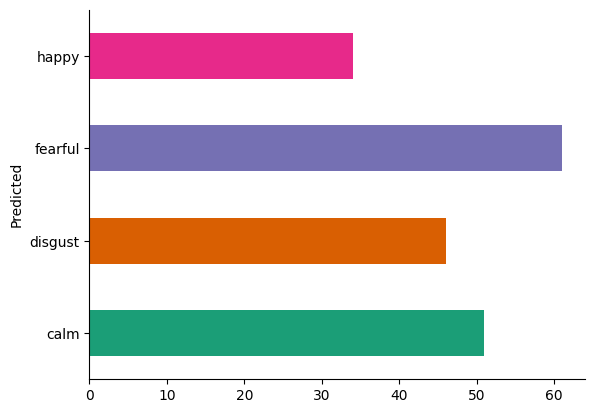

In [ ]:
# @title Predicted

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Predicted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

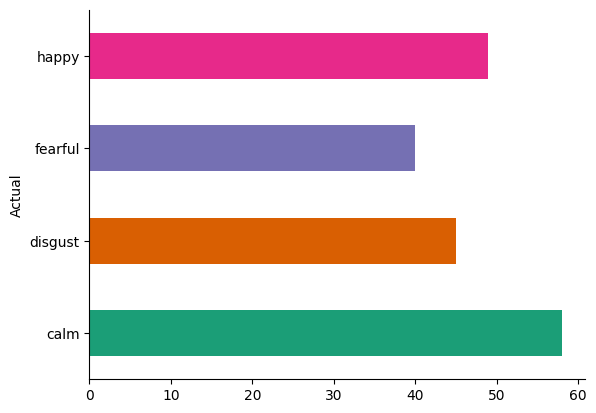

In [ ]:
# @title Actual

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Actual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_20/03-01-07-02-02-02-20.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['disgust'], dtype='<U7')

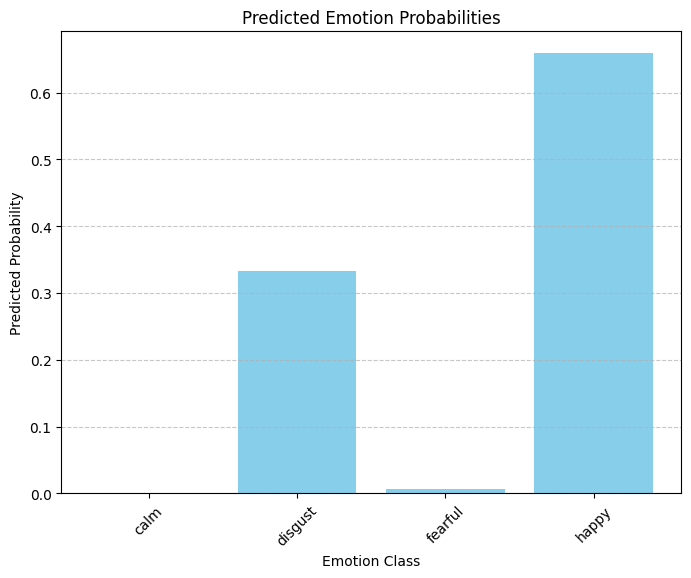

In [ ]:
import matplotlib.pyplot as plt

# Assuming loaded_model.predict_proba() returns the predicted probabilities for each class
predicted_probabilities = loaded_model.predict_proba(feature)[0]

# Get the class labels
class_labels = loaded_model.classes_

# Plot the predicted probabilities as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, predicted_probabilities, color='skyblue')
plt.xlabel('Emotion Class')
plt.ylabel('Predicted Probability')
plt.title('Predicted Emotion Probabilities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


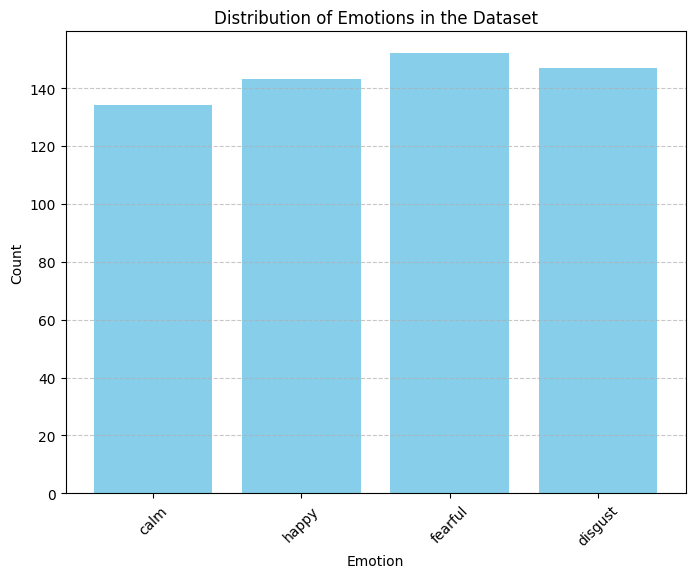

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each emotion label in the dataset
emotion_counts = {emotion: y_train.count(emotion) for emotion in observed_emotions}

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in the Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


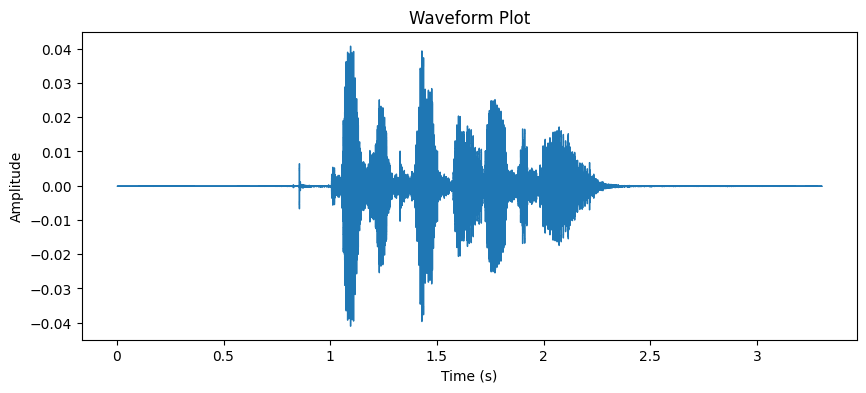

In [ ]:
import librosa.display

# Load an example audio file
example_audio_file = "/content/drive/MyDrive/Colab_Notebooks/RAVDESS_Emotional_speech_audio/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav"
waveform, sample_rate = librosa.load(example_audio_file)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform, sr=sample_rate)
plt.title('Waveform Plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing your audio files
audio_dir = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data"

# Initialize empty lists to store audio properties
audio_properties = []

# Iterate over each audio file in the directory
for audio_file in os.listdir(audio_dir):
    # Construct the full path to the audio file
    audio_path = os.path.join(audio_dir, audio_file)

    # Load the audio file and extract its properties
    try:
        audio_data, sample_rate = librosa.load(audio_path, sr=None)
        duration = librosa.get_duration(y=audio_data, sr=sample_rate)

        # Append the audio properties to the list
        audio_properties.append({
            'Audio File': audio_file,
            'Duration (seconds)': duration,
            'Sample Rate (Hz)': sample_rate
        })
    except Exception as e:
        print(f"Error processing {audio_file}: {str(e)}")
        # Add a placeholder entry to the list to prevent it from being empty
        audio_properties.append({
            'Audio File': audio_file,
            'Duration (seconds)': None,
            'Sample Rate (Hz)': None
        })

# Convert the list of audio properties to a pandas DataFrame
df_audio_properties = pd.DataFrame(audio_properties)

# Display the basic statistics for the

<ipython-input-33-1c29c8fdbc89>:17: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing Actor_21: [Errno 21] Is a directory: '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_21'
Error processing Actor_24: [Errno 21] Is a directory: '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_24'
Error processing Actor_22: [Errno 21] Is a directory: '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_22'
Error processing Actor_19: [Errno 21] Is a directory: '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_19'
Error processing Actor_15: [Errno 21] Is a directory: '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_15'
Error processing Actor_20: [Errno 21] Is a directory: '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_20'
Error processing Actor_17: [Errno 21] Is a directory: '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_17'
Error processing Actor_16: [Errno 21] Is a directory: '/content/drive/MyDrive/speech-emotion-recognition

TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

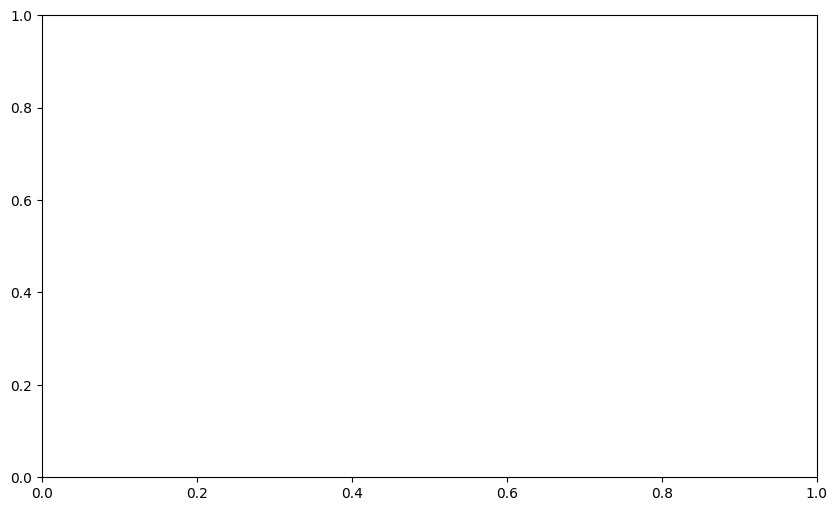

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of audio durations
plt.figure(figsize=(10, 6))
plt.hist(df_audio_properties['Duration (seconds)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Audio Durations')
plt.grid(True)
plt.show()

# Plot histogram of sample rates
plt.figure(figsize=(10, 6))
plt.hist(df_audio_properties['Sample Rate (Hz)'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Rates')
plt.grid(True)
plt.show()


<ipython-input-35-bf590d80338d>:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')


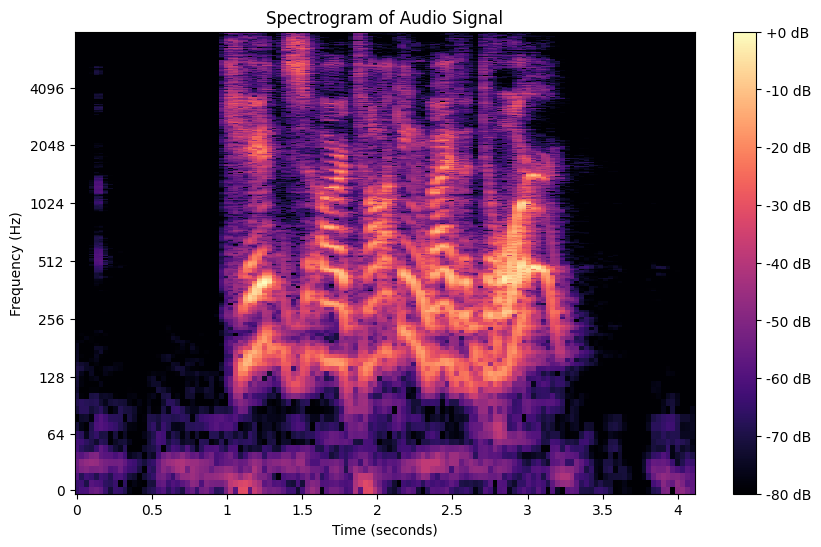

In [ ]:
import librosa.display

# Choose an audio file from your dataset
audio_file_path = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_19/03-01-08-02-01-01-19.wav"

# Load the audio file
audio_data, sample_rate = librosa.load(audio_file_path, sr=None)

# Create and plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the sizes of the training and testing sets
training_size = len(x_train)
testing_size = len(x_test)

# Data labels
labels = ['Training Set', 'Testing Set']

# Data sizes
sizes = [training_size, testing_size]

# Plotting the data splitting
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Data Splitting')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=loaded_model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=loaded_model.classes_, yticklabels=loaded_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test, y_pred, target_names=loaded_model.classes_, output_dict=True)

# Convert the report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot the performance metrics
plt.figure(figsize=(12, 6))
report_df.drop(columns=['support']).iloc[:-1, :].plot(kind='bar', figsize=(12, 6))
plt.title('Performance Metrics')
plt.xlabel('Emotion')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
importances = model.coefs_[0]  # Example: Assuming a single-layer MLP
feature_names = ['mfcc', 'chroma', 'mel']

# Calculate the average importance for each feature
average_importances = importances.mean(axis=1)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, average_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Speech Emotion Recognition')
plt.show()


In [ ]:
# Assuming `feature` is the feature vector for the sample audio file
predicted_probabilities = loaded_model.predict_proba(feature)[0]

# Get the class labels
class_labels = loaded_model.classes_

# Plot the predicted probabilities as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, predicted_probabilities, color='skyblue')
plt.xlabel('Emotion Class')
plt.ylabel('Predicted Probability')
plt.title('Predicted Emotion Probabilities for a Sample Audio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
!pip install eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Compute feature importances
perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)

# Display the feature importances
eli5.show_weights(perm, feature_names = None)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance

# Compute feature importances
perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)

# Extract feature importances
feature_importances = perm.feature_importances_
feature_names = [f"feature_{i}" for i in range(len(feature_importances))]

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances using Permutation Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Assuming you have a history object from training
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
